The purpose of this notebook is to create a simple powerpoint with multiple pages.  
It serves to essentially create many, evenly spaced and formatted slides from semi-clean data.

It takes an excel sheet with multiple columns and organizes the records into groupings based on URL type, and then split the URLS into groups to fit them all on several slides, while adhering to formatting conventions for the client.

Below is an _example_ of what an output might look like

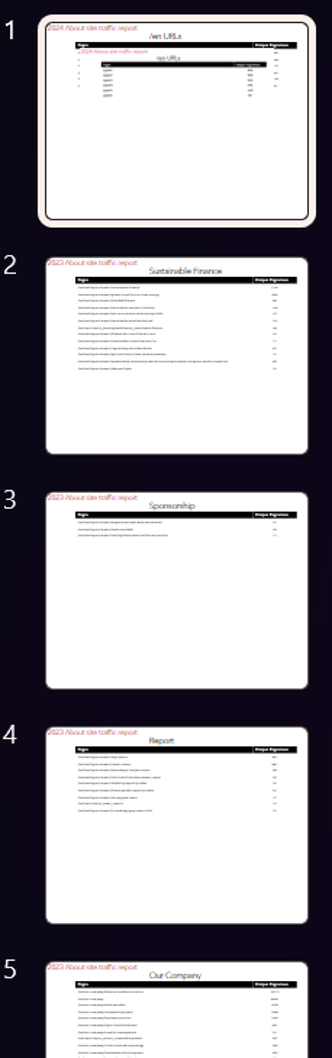

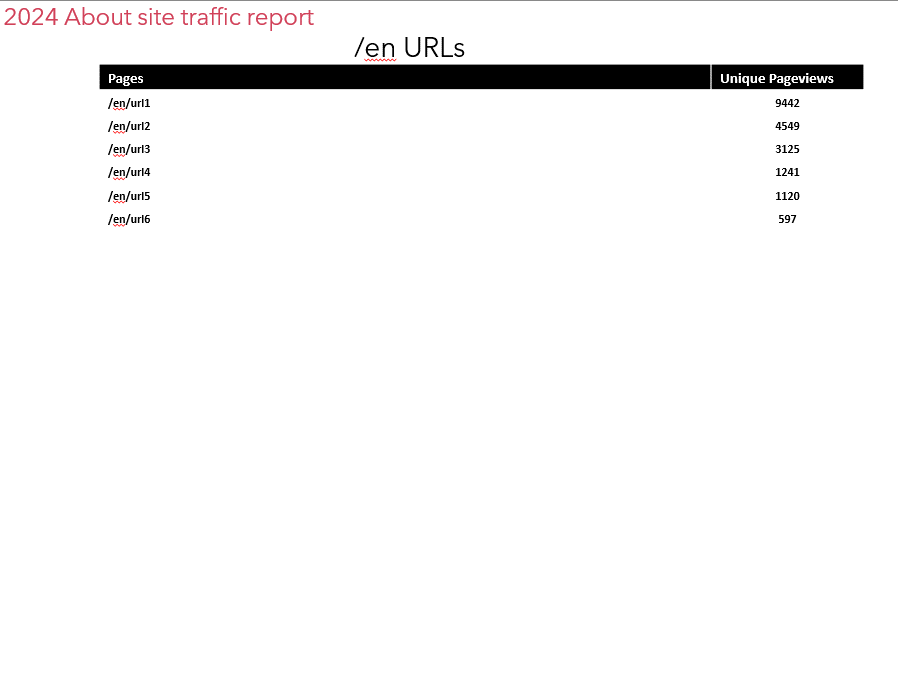

In [3]:
from PIL import Image
from IPython.display import display

display(Image.open("slides example.png"))
display(Image.open("Example Image.png"))


In [ ]:
# Imports

#import will2live
from pptx import Presentation
from pptx.util import Inches, Pt, Emu
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN
import pandas as pd
import numpy as np

import pandas as pd
from pptx import Presentation
from pptx.util import Pt, Inches, Emu
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import numpy as np



In [13]:
footnote_text="December"

In [14]:
powerpointname='site_traffic_report_'+footnote_text+".pptx"
powerpointname

'site_traffic_report_December.pptx'

In [15]:
# read excel file
excel_file = 'decdata.xlsx'
df = pd.read_excel(excel_file)  # assuming all data is in one sheet

In [16]:
def add_footnote(slide, prs, text="Your footnote text here"):
    """
    Adds a footnote to the given slide.
    """
    slide_height = prs.slide_height
    slide_width = prs.slide_width

    footnote_height = Emu(500000)  # height of the footnote area
    footnote_top = slide_height - footnote_height  # position footnote at the bottom
    footnote_left = Emu(0)  # align to the left of the slide
    footnote_width = slide_width

    textbox = slide.shapes.add_textbox(footnote_left, footnote_top, footnote_width, footnote_height)
    text_frame = textbox.text_frame
    p = text_frame.paragraphs[0]
    run = p.add_run()
    run.text = text
    run.font.size = Pt(10)  # footnote font size
    p.alignment = PP_ALIGN.CENTER  # center align the footnote

In [17]:
# instantiate the presentation (pwpt) object
prs = Presentation()

In [18]:
# define font sizes and other constants
font_size_header = Pt(12)
font_size_body = Pt(9.5)
table_left = Inches(1.1)
table_top = Inches(.70)
table_width = Inches(8.5)
row_height = Emu(140000)  # adjusted row height
rows_per_table = 22

In [19]:



# assuming the additional column for grouping is named 'Section'
for group in df['Section'].unique():
    grouped_df = df[df['Section'] == group]

    num_tables = len(grouped_df) // rows_per_table + (len(grouped_df) % rows_per_table > 0)

    for i in range(num_tables):
        # add a slide
        slide_layout = prs.slide_layouts[6]
        slide = prs.slides.add_slide(slide_layout)

        # adjustments for text boxes
        shift_left = Emu(-3000000)
        shift_up = Emu(200000)

        # add first text box (shifted)
        textbox1 = slide.shapes.add_textbox(Emu(507245) - shift_left, Emu(463902) - shift_up, Emu(10509370), Emu(436017))
        tf1 = textbox1.text_frame
        tf1.text = group  # set text to the group name
        p = tf1.paragraphs[0]
        run = p.runs[0]
        run.font.size = Pt(22)
        run.font.name = 'Avenir Next LT Pro'

        # shift values for moving the text boxes up and left
        shift_left = Emu(550000) 
        shift_up = Emu(300000) 
        
        # Add the second text box (shifted)
        textbox2 = slide.shapes.add_textbox(Emu(492980) - shift_left, Emu(260671) - shift_up, Emu(4383819), Emu(202944))
        tf2 = textbox2.text_frame
        tf2.text = '2023 About Site Traffic Report'
        p = tf2.paragraphs[0]
        run = p.runs[0]
        run.font.size = Pt(19)
        run.font.name = 'Avenir Next LT Pro'
        run.font.color.rgb = RGBColor(0xD1, 0x41, 0x59)

        add_footnote(slide,prs, text=footnote_text)

        # calc start and end index for the current table
        start_idx = i * rows_per_table
        end_idx = min(start_idx + rows_per_table, len(grouped_df))

        # calc table height based on number of rows and row height
        table_height = row_height * (end_idx - start_idx + 1)

        # add table to slide
        table = slide.shapes.add_table(rows=end_idx - start_idx + 1, cols=2, 
                                       left=table_left, top=table_top, 
                                       width=table_width, height=table_height).table

        # set column widths
        first_col_width = table_width * 0.80
        second_col_width = table_width * 0.20
        table.columns[0].width = int(first_col_width)
        table.columns[1].width = int(second_col_width)

        # set row heights and fill data
        for row_idx, row in enumerate(table.rows):
            row.height = row_height
            for col_idx, cell in enumerate(row.cells):
                cell.fill.solid()
                cell.fill.fore_color.rgb = RGBColor(255, 255, 255) if row_idx > 0 else RGBColor(0, 0, 0)
                
                text_frame = cell.text_frame
                text_frame.clear()
                p = text_frame.paragraphs[0]
                run = p.add_run()

                # set text for header and data rows
                if row_idx == 0:
                    run.text = ['Pages', 'Visits'][col_idx]
                    run.font.size = font_size_header
                    p.alignment = PP_ALIGN.LEFT if col_idx == 0 else PP_ALIGN.CENTER
                else:
                    # reference the 'Pages' and 'Visits' columns
                    if col_idx == 0:
                        cell_value = grouped_df.iloc[row_idx - 1 + start_idx]['Row Labels']
                    else:  # col_idx == 1
                        cell_value = grouped_df.iloc[row_idx - 1 + start_idx]['Adobe Visits']

                    # format cell values
                    if isinstance(cell_value, (int, float, np.integer)):
                        run.font.size = font_size_body
                        run.font.bold = True
                        p.alignment = PP_ALIGN.CENTER if col_idx == 1 else PP_ALIGN.LEFT
                        run.text = f"{cell_value:,.0f}"  # Format numbers with commas
                    else:
                        run.font.size = font_size_body
                        p.alignment = PP_ALIGN.CENTER if col_idx == 1 else PP_ALIGN.LEFT
                        run.text = str(cell_value)
                        run.font.bold = True
                        run.font.color.rgb = RGBColor(0, 0, 0) if row_idx > 0 else RGBColor(255, 255, 255)





In [20]:
# save powerpoint file
prs.save(powerpointname)

In [21]:
## Code split below for more readability, and teaching to colleagues. 

In [22]:
for group in df['Section'].unique():
    grouped_df = df[df['Section'] == group]

    num_tables = len(grouped_df) // rows_per_table + (len(grouped_df) % rows_per_table > 0)

    for i in range(num_tables):
        # Add a slide
        slide_layout = prs.slide_layouts[6]
        slide = prs.slides.add_slide(slide_layout)

        
        

        ######################################
        # adjustments for the text boxes
        shift_left = Emu(-3000000)
        shift_up = Emu(200000)
        
        # add the first text box (shifted)
        textbox1 = slide.shapes.add_textbox(Emu(507245) - shift_left, Emu(463902) - shift_up, Emu(10509370), Emu(436017))
        tf1 = textbox1.text_frame
        tf1.text = group  # Setting text to the group name
        p = tf1.paragraphs[0]
        run = p.runs[0]
        run.font.size = Pt(22)
        run.font.name = 'Avenir Next LT Pro'
        #######################################
            
        #
        
        #######################################
        # values for moving the text boxes up and left
        shift_left = Emu(550000)  # Adjust as needed
        shift_up = Emu(300000)  # Adjust as needed
        
        # add second text box (shifted)
        textbox2 = slide.shapes.add_textbox(Emu(492980) - shift_left, Emu(260671) - shift_up, Emu(4383819), Emu(202944))
        tf2 = textbox2.text_frame
        tf2.text = '2023 About Site Traffic Report'
        p = tf2.paragraphs[0]
        run = p.runs[0]
        run.font.size = Pt(19)
        run.font.name = 'Avenir Next LT Pro'
        run.font.color.rgb = RGBColor(0xD1, 0x41, 0x59)
        #######################################
        
        #
        
        #######################################
        add_footnote(slide,prs, text=footnote_text)
        #######################################

        #
        
        #######################################
        # calc start and end index for the current table
        start_idx = i * rows_per_table
        end_idx = min(start_idx + rows_per_table, len(grouped_df))
        #######################################

        #
        
        #######################################
        # calc table height based on number of rows and row height
        table_height = row_height * (end_idx - start_idx + 1)
        #######################################

        #
        
        #######################################
        # add table to the slide
        table = slide.shapes.add_table(rows=end_idx - start_idx + 1, cols=2, 
                                       left=table_left, top=table_top, 
                                       width=table_width, height=table_height).table

        # set column widths
        first_col_width = table_width * 0.80
        second_col_width = table_width * 0.20
        table.columns[0].width = int(first_col_width)
        table.columns[1].width = int(second_col_width)

        # set row heights and fill data
        for row_idx, row in enumerate(table.rows):
            row.height = row_height
            for col_idx, cell in enumerate(row.cells):
                cell.fill.solid()
                cell.fill.fore_color.rgb = RGBColor(255, 255, 255) if row_idx > 0 else RGBColor(0, 0, 0)
                
                text_frame = cell.text_frame
                text_frame.clear()
                p = text_frame.paragraphs[0]
                run = p.add_run()

                # set text for header and data rows
                if row_idx == 0:
                    run.text = ['Pages', 'Visits'][col_idx]
                    run.font.size = font_size_header
                    p.alignment = PP_ALIGN.LEFT if col_idx == 0 else PP_ALIGN.CENTER
                else:
                    # correctly reference the 'Pages' and 'Visits' columns
                    if col_idx == 0:
                        cell_value = grouped_df.iloc[row_idx - 1 + start_idx]['Row Labels']
                    else:  # col_idx == 1
                        cell_value = grouped_df.iloc[row_idx - 1 + start_idx]['Adobe Visits']

                    # format cell values
                    if isinstance(cell_value, (int, float, np.integer)):
                        run.font.size = font_size_body
                        run.font.bold = True
                        p.alignment = PP_ALIGN.CENTER if col_idx == 1 else PP_ALIGN.LEFT
                        run.text = f"{cell_value:,.0f}"  # Format numbers with commas
                    else:
                        run.font.size = font_size_body
                        p.alignment = PP_ALIGN.CENTER if col_idx == 1 else PP_ALIGN.LEFT
                        run.text = str(cell_value)
                        run.font.bold = True
                        run.font.color.rgb = RGBColor(0, 0, 0) if row_idx > 0 else RGBColor(255, 255, 255)



